In [4]:
import findspark

In [5]:
findspark.init()

ValueError: Couldn't find Spark, make sure SPARK_HOME env is set or Spark is in an expected location (e.g. from homebrew installation).

In [10]:
import pyspark

In [11]:
from pyspark.sql import SparkSession

In [12]:
spark = SparkSession.builder.appName('demo').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/27 23:53:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [13]:
spark

In [14]:
df_branch = spark.read.csv('Branch.csv',header=True,inferSchema=True)

In [15]:
df_branch.show()

+-----------+-----------------+--------------------+-------------+------------+----------+-------------+
|BRANCH_CODE|      BRANCH_NAME|       BRANCH_STREET|  BRANCH_CITY|BRANCH_STATE|BRANCH_ZIP| BRANCH_PHONE|
+-----------+-----------------+--------------------+-------------+------------+----------+-------------+
|       6300|  SBI_Brownsville|       Heather Plaza|  Brownsville|          TX|     78521|1800-200-2535|
|       9526|    SBI_Littleton|  Noble Embers Ridge|    Littleton|          CO|     80126|1800-500-7121|
|       3422|   SBI_Caguas_BPB|   Blue Pioneer Bend|       Caguas|          PR|       734|1800-300-7858|
|       8300|   SBI_San Marcos|       Little Common|   San Marcos|          CA|     92069|1800-700-6985|
|       9527|   SBI_Caguas_CRV|  Crystal River Mall|       Caguas|          PR|       729|1800-500-5485|
|       3420|      SBI_Passaic|Sleepy Quail Prom...|      Passaic|          NJ|      7055|1800-300-8524|
|       6301|    SBI_Caguas_HC|     High Concession|   

In [16]:
df_branch.printSchema()

root
 |-- BRANCH_CODE: integer (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_ZIP: integer (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)



CUSTOMER DATAFRAME

In [17]:
df_cust = spark.read.csv('Customer.csv',header=True,inferSchema=True)


In [18]:
df_cust.show(10)

+----------+-----------+-----------+-----------+----------------+---------+----------+-------------+---------+--------------------+-----------+----------+------------+--------+---------------+--------------------+
|   CUST_ID|CUST_F_NAME|CUST_M_NAME|CUST_L_NAME|      CUST_CC_NO|CARD_TYPE|CARD_LIMIT|CARD_END_DATE| CUST_SSN|         CUST_STREET|  CUST_CITY|CUST_STATE|CUST_COUNTRY|CUST_ZIP|     CUST_PHONE|          CUST_EMAIL|
+----------+-----------+-----------+-----------+----------------+---------+----------+-------------+---------+--------------------+-----------+----------+------------+--------+---------------+--------------------+
|3562001602|   Chrissie|       null|     Rayner|6334878173213670|     amex|    500000|    9/12/2017|567936602|  Noble Embers Ridge|  Littleton|        CO|          US|   80126|+1 717 949 2403|  crayner1@intel.com|
|3562001603|      Titus|       null|   Paolozzi|3567523223820780|     visa|     50000|    6/17/2024|190445473|   Blue Pioneer Bend|     Caguas| 

In [19]:
df_cust.printSchema()

root
 |-- CUST_ID: long (nullable = true)
 |-- CUST_F_NAME: string (nullable = true)
 |-- CUST_M_NAME: string (nullable = true)
 |-- CUST_L_NAME: string (nullable = true)
 |-- CUST_CC_NO: long (nullable = true)
 |-- CARD_TYPE: string (nullable = true)
 |-- CARD_LIMIT: integer (nullable = true)
 |-- CARD_END_DATE: string (nullable = true)
 |-- CUST_SSN: integer (nullable = true)
 |-- CUST_STREET: string (nullable = true)
 |-- CUST_CITY: string (nullable = true)
 |-- CUST_STATE: string (nullable = true)
 |-- CUST_COUNTRY: string (nullable = true)
 |-- CUST_ZIP: integer (nullable = true)
 |-- CUST_PHONE: string (nullable = true)
 |-- CUST_EMAIL: string (nullable = true)



TRAN_CREDITCARD DATAFRAME

In [20]:
df_tran = spark.read.csv('Tran_creditcard.csv',header=True,inferSchema=True)

In [21]:
df_tran.show(10)

+-------+----------+----------+----------------+---------+-----------+---------+----------+
|TRAN_ID| TRAN_DATE|   CUST_ID|      CUST_CC_NO| CUST_SSN|BRANCH_CODE|TRAN_TYPE|TRAN_VALUE|
+-------+----------+----------+----------------+---------+-----------+---------+----------+
|  33333|2018-11-28|3562001602|6334878173213670|567936602|       9526| Purchase|     20000|
|  41012|2018-11-28|3562001602|6334878173213670|567936602|       9526|  Payment|    -20000|
|  42022|2018-12-08|3562001602|6334878173213670|567936602|       9526| Purchase|     20000|
|  42028|2018-12-15|3562001602|6334878173213670|567936602|       9526| Purchase|      2000|
|  42033|2018-12-24|3562001602|6334878173213670|567936602|       9526|  Payment|     -3000|
|  42037|2019-01-01|3562001602|6334878173213670|567936602|       9526| Purchase|      3000|
|  42041|2019-01-11|3562001602|6334878173213670|567936602|       9526| Purchase|      4000|
|  42044|2019-01-24|3562001602|6334878173213670|567936602|       9526|  Payment|

In [22]:
df_tran.printSchema()

root
 |-- TRAN_ID: integer (nullable = true)
 |-- TRAN_DATE: string (nullable = true)
 |-- CUST_ID: long (nullable = true)
 |-- CUST_CC_NO: long (nullable = true)
 |-- CUST_SSN: integer (nullable = true)
 |-- BRANCH_CODE: integer (nullable = true)
 |-- TRAN_TYPE: string (nullable = true)
 |-- TRAN_VALUE: integer (nullable = true)



PARTITIONING

Partitioning based on month and year

In [23]:
from pyspark.sql.functions import year, month, col
tran_creditcard = df_tran.withColumn("year",year(col("tran_date"))).withColumn("month",month(col("tran_date")))

In [24]:
tran_creditcard.show()

+-------+----------+----------+----------------+---------+-----------+---------+----------+----+-----+
|TRAN_ID| TRAN_DATE|   CUST_ID|      CUST_CC_NO| CUST_SSN|BRANCH_CODE|TRAN_TYPE|TRAN_VALUE|year|month|
+-------+----------+----------+----------------+---------+-----------+---------+----------+----+-----+
|  33333|2018-11-28|3562001602|6334878173213670|567936602|       9526| Purchase|     20000|2018|   11|
|  41012|2018-11-28|3562001602|6334878173213670|567936602|       9526|  Payment|    -20000|2018|   11|
|  42022|2018-12-08|3562001602|6334878173213670|567936602|       9526| Purchase|     20000|2018|   12|
|  42028|2018-12-15|3562001602|6334878173213670|567936602|       9526| Purchase|      2000|2018|   12|
|  42033|2018-12-24|3562001602|6334878173213670|567936602|       9526|  Payment|     -3000|2018|   12|
|  42037|2019-01-01|3562001602|6334878173213670|567936602|       9526| Purchase|      3000|2019|    1|
|  42041|2019-01-11|3562001602|6334878173213670|567936602|       9526| Pu

In [25]:
#Adding a column total_purchase
from pyspark.sql import functions as f
purchase = tran_creditcard.withColumn('Total_Purchase', f.when(f.col('tran_type') == 'Purchase',tran_creditcard.TRAN_VALUE).otherwise(0))

In [26]:
#adding a column total_payment
from pyspark.sql import functions as f
payment = purchase.withColumn('Total_Payment', f.when(f.col('tran_type') == 'Payment',purchase.TRAN_VALUE).otherwise(0))

In [27]:
payment.show()

+-------+----------+----------+----------------+---------+-----------+---------+----------+----+-----+--------------+-------------+
|TRAN_ID| TRAN_DATE|   CUST_ID|      CUST_CC_NO| CUST_SSN|BRANCH_CODE|TRAN_TYPE|TRAN_VALUE|year|month|Total_Purchase|Total_Payment|
+-------+----------+----------+----------------+---------+-----------+---------+----------+----+-----+--------------+-------------+
|  33333|2018-11-28|3562001602|6334878173213670|567936602|       9526| Purchase|     20000|2018|   11|         20000|            0|
|  41012|2018-11-28|3562001602|6334878173213670|567936602|       9526|  Payment|    -20000|2018|   11|             0|       -20000|
|  42022|2018-12-08|3562001602|6334878173213670|567936602|       9526| Purchase|     20000|2018|   12|         20000|            0|
|  42028|2018-12-15|3562001602|6334878173213670|567936602|       9526| Purchase|      2000|2018|   12|          2000|            0|
|  42033|2018-12-24|3562001602|6334878173213670|567936602|       9526|  Paym

In [28]:
payment.printSchema()

root
 |-- TRAN_ID: integer (nullable = true)
 |-- TRAN_DATE: string (nullable = true)
 |-- CUST_ID: long (nullable = true)
 |-- CUST_CC_NO: long (nullable = true)
 |-- CUST_SSN: integer (nullable = true)
 |-- BRANCH_CODE: integer (nullable = true)
 |-- TRAN_TYPE: string (nullable = true)
 |-- TRAN_VALUE: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- Total_Purchase: integer (nullable = true)
 |-- Total_Payment: integer (nullable = true)



In [29]:
from pyspark.sql.functions import *
creditCard_sum = payment.groupby(["cust_cc_no","year","month"]).agg(sum("Total_Purchase"),sum("Total_Payment"))

In [30]:
creditCard_sum.count()

77

In [31]:
#renaming cust__c_no in customer
df_cust = df_cust.withColumnRenamed('cust_cc_no','cust_cc_no_c')

In [32]:
#joining df_cust and creditCard_purchase

df_joined = df_cust.join(creditCard_sum,df_cust.cust_cc_no_c == creditCard_sum.cust_cc_no,"inner")

In [33]:
df_joined.show(5)

+----------+-----------+-----------+-----------+----------------+---------+----------+-------------+---------+------------------+---------+----------+------------+--------+---------------+--------------------+----------------+----+-----+-------------------+------------------+
|   CUST_ID|CUST_F_NAME|CUST_M_NAME|CUST_L_NAME|    cust_cc_no_c|CARD_TYPE|CARD_LIMIT|CARD_END_DATE| CUST_SSN|       CUST_STREET|CUST_CITY|CUST_STATE|CUST_COUNTRY|CUST_ZIP|     CUST_PHONE|          CUST_EMAIL|      cust_cc_no|year|month|sum(Total_Purchase)|sum(Total_Payment)|
+----------+-----------+-----------+-----------+----------------+---------+----------+-------------+---------+------------------+---------+----------+------------+--------+---------------+--------------------+----------------+----+-----+-------------------+------------------+
|3562001602|   Chrissie|       null|     Rayner|6334878173213670|     amex|    500000|    9/12/2017|567936602|Noble Embers Ridge|Littleton|        CO|          US|   801

In [34]:
#concatenating names

from pyspark.sql.functions import concat,concat_ws,col
df_joined_con = df_joined.withColumn('Full_Name', concat_ws(" ",df_joined.CUST_F_NAME,df_joined.CUST_L_NAME))

In [35]:
df_joined_con.show(5)

+----------+-----------+-----------+-----------+----------------+---------+----------+-------------+---------+------------------+---------+----------+------------+--------+---------------+--------------------+----------------+----+-----+-------------------+------------------+---------------+
|   CUST_ID|CUST_F_NAME|CUST_M_NAME|CUST_L_NAME|    cust_cc_no_c|CARD_TYPE|CARD_LIMIT|CARD_END_DATE| CUST_SSN|       CUST_STREET|CUST_CITY|CUST_STATE|CUST_COUNTRY|CUST_ZIP|     CUST_PHONE|          CUST_EMAIL|      cust_cc_no|year|month|sum(Total_Purchase)|sum(Total_Payment)|      Full_Name|
+----------+-----------+-----------+-----------+----------------+---------+----------+-------------+---------+------------------+---------+----------+------------+--------+---------------+--------------------+----------------+----+-----+-------------------+------------------+---------------+
|3562001602|   Chrissie|       null|     Rayner|6334878173213670|     amex|    500000|    9/12/2017|567936602|Noble Ember

In [36]:
CredCard_Year_Mon_Summ = df_joined_con.select('cust_id','Full_Name','cust_cc_no','card_limit','card_type','year','month','sum(Total_Purchase)','sum(Total_Payment)')

In [37]:
CredCard_Year_Mon_Summ.show(5)

+----------+---------------+----------------+----------+---------+----+-----+-------------------+------------------+
|   cust_id|      Full_Name|      cust_cc_no|card_limit|card_type|year|month|sum(Total_Purchase)|sum(Total_Payment)|
+----------+---------------+----------------+----------+---------+----+-----+-------------------+------------------+
|3562001692|  Layne Phelips|5602236760338580|    500000|     amex|2019|   11|              10000|                 0|
|3562001699|  Brig Tompkiss|2014268557886530|    500000|     amex|2018|    8|               8400|             -2400|
|3562001674|  Rhoda Biddles|3549138667705450|     50000|     visa|2018|    9|             280000|           -260500|
|3562001617|Tucky Sabbatier|3058775791217550|    500000|     amex|2019|    2|              50000|            -50000|
|3562001617|Tucky Sabbatier|3058775791217550|    500000|     amex|2018|   11|              80000|            -40000|
+----------+---------------+----------------+----------+--------

In [38]:
CredCard_Year_Mon_Summ=CredCard_Year_Mon_Summ.withColumnRenamed('sum(Total_Purchase)','Total_Purchase')
CredCard_Year_Mon_Summ=CredCard_Year_Mon_Summ.withColumnRenamed('sum(Total_Payment)','Total_Payment')

In [39]:
CredCard_Year_Mon_Summ.count()

77

In [40]:
CredCard_Year_Mon_Summ.show(77)

+----------+----------------+----------------+----------+---------+----+-----+--------------+-------------+
|   cust_id|       Full_Name|      cust_cc_no|card_limit|card_type|year|month|Total_Purchase|Total_Payment|
+----------+----------------+----------------+----------+---------+----+-----+--------------+-------------+
|3562001692|   Layne Phelips|5602236760338580|    500000|     amex|2019|   11|         10000|            0|
|3562001699|   Brig Tompkiss|2014268557886530|    500000|     amex|2018|    8|          8400|        -2400|
|3562001674|   Rhoda Biddles|3549138667705450|     50000|     visa|2018|    9|        280000|      -260500|
|3562001617| Tucky Sabbatier|3058775791217550|    500000|     amex|2019|    2|         50000|       -50000|
|3562001617| Tucky Sabbatier|3058775791217550|    500000|     amex|2018|   11|         80000|       -40000|
|3562001607|Merrill Ratcliff|5403648817321420|    100000|   master|2017|    7|           234|         -234|
|3562001664|     Nessy Royal

FUNCTIONAL REQUIREMENT 2

In [41]:
from pyspark.sql.functions import expr, col
CredCard_Limit = CredCard_Year_Mon_Summ.withColumn("Remarks",expr("CASE WHEN card_limit<Total_purchase THEN 'ALERT CC TEAM'" + "ELSE 'NO ALERT' END"))

In [42]:
CredCard_Limit.show(5)

+----------+---------------+----------------+----------+---------+----+-----+--------------+-------------+-------------+
|   cust_id|      Full_Name|      cust_cc_no|card_limit|card_type|year|month|Total_Purchase|Total_Payment|      Remarks|
+----------+---------------+----------------+----------+---------+----+-----+--------------+-------------+-------------+
|3562001692|  Layne Phelips|5602236760338580|    500000|     amex|2019|   11|         10000|            0|     NO ALERT|
|3562001699|  Brig Tompkiss|2014268557886530|    500000|     amex|2018|    8|          8400|        -2400|     NO ALERT|
|3562001674|  Rhoda Biddles|3549138667705450|     50000|     visa|2018|    9|        280000|      -260500|ALERT CC TEAM|
|3562001617|Tucky Sabbatier|3058775791217550|    500000|     amex|2019|    2|         50000|       -50000|     NO ALERT|
|3562001617|Tucky Sabbatier|3058775791217550|    500000|     amex|2018|   11|         80000|       -40000|     NO ALERT|
+----------+---------------+----

In [43]:
CredCard_Limit_Exed = CredCard_Limit.filter(CredCard_Limit['Remarks'] == 'ALERT CC TEAM')

In [44]:
CredCard_Limit_Exed.show()

+----------+--------------+----------------+----------+---------+----+-----+--------------+-------------+-------------+
|   cust_id|     Full_Name|      cust_cc_no|card_limit|card_type|year|month|Total_Purchase|Total_Payment|      Remarks|
+----------+--------------+----------------+----------+---------+----+-----+--------------+-------------+-------------+
|3562001674| Rhoda Biddles|3549138667705450|     50000|     visa|2018|    9|        280000|      -260500|ALERT CC TEAM|
|3562001621|  Peg Welbrock|3537914201882630|     50000|     visa|2018|    9|         55600|       -47600|ALERT CC TEAM|
|3562001608|Venita Rutgers|3547496963061990|     50000|     visa|2016|    2|         52460|       -20000|ALERT CC TEAM|
|3562001630|Elladine Dealy|6378610833616780|    100000|   master|2017|    4|        200000|      -200000|ALERT CC TEAM|
|3562001649|  Fawnia Swale|5127419432105430|    100000|   master|2019|    2|        120000|      -120000|ALERT CC TEAM|
|3562001649|  Fawnia Swale|5127419432105

In [45]:
CredCard_Limit_Exed.count()

6

FUNCTIONAL REQUIREMENT 3

In [46]:
from pyspark.sql.functions import *
df_due = payment.groupby(["cust_cc_no","year"]).agg(sum("Total_Purchase"),sum("Total_Payment"))
df_due = df_due.withColumnRenamed('sum(Total_Purchase)','Total_Purchase')
df_due = df_due.withColumnRenamed('sum(Total_Payment)','Total_Payment')
#df_due = tran_creditcard.filter(tran_creditcard['TRAN_TYPE']=="Purchase").groupby(["cust_cc_no","year"]).agg(sum("TRAN_VALUE"))
#creditCard_sum = payment.groupby(["cust_cc_no","year","month"]).agg(sum("Total_Purchase"),sum("Total_Payment"))

In [47]:
df_due.show(5)

+----------------+----+--------------+-------------+
|      cust_cc_no|year|Total_Purchase|Total_Payment|
+----------------+----+--------------+-------------+
|3566727575950610|2017|          4000|            0|
|5403648817321420|2016|           824|         -824|
|3549138667705450|2017|         50000|       -30000|
|3547496963061990|2016|         59460|       -20000|
|2017763113611190|2018|         80000|       -40000|
+----------------+----+--------------+-------------+
only showing top 5 rows



In [48]:
df_overdue = df_due.withColumn('Annual_overdue',df_due['Total_Purchase']+df_due['Total_Payment'])

In [49]:
df_overdue = df_overdue.orderBy("year")

In [50]:
df_overdue.count()

47

In [51]:
df_overdue.show(15)

+----------------+----+--------------+-------------+--------------+
|      cust_cc_no|year|Total_Purchase|Total_Payment|Annual_overdue|
+----------------+----+--------------+-------------+--------------+
|6378610833616780|2016|        100000|      -100000|             0|
|3566727575950610|2016|          6000|            0|          6000|
|3567523223820780|2016|         50000|            0|         50000|
|5602257512986730|2016|        200000|      -200000|             0|
|5403648817321420|2016|           824|         -824|             0|
|3039905356295530|2016|         15000|            0|         15000|
|3547496963061990|2016|         59460|       -20000|         39460|
|3531017574361360|2016|         10000|            0|         10000|
|3588589058006900|2016|         15000|            0|         15000|
|3537914201882630|2017|         21000|       -13500|          7500|
|3531017574361360|2017|         50000|       -45000|          5000|
|6378610833616780|2017|        200000|      -200

In [52]:
from pyspark.sql.functions import *

In [53]:
df_category = df_overdue.withColumn('Remark',expr("CASE WHEN Annual_overdue<=0 THEN 'GOOD'" + "WHEN Annual_overdue<=10000 THEN 'NORMAL'" + "ELSE 'POOR' END"))

In [54]:
df_category = df_category.orderBy("year")

In [55]:
df_category.count()

47

In [56]:
#count no of poor customers
df_category.select('Remark').where(df_category.Remark == 'POOR').count()

17

In [57]:
#count no of good customers
df_category.select('Remark').where(df_category.Remark == 'GOOD').count()

15

In [58]:
#count no of normal customers
df_category.select('Remark').where(df_category.Remark == 'NORMAL').count()

15

FUNCTIONAL REQUIREMENT 4

Grouping by Card_type

In [59]:
df_plot = df_cust.join(df_category,df_cust.cust_cc_no_c == df_category.cust_cc_no,"inner").select('cust_cc_no','year','Total_Purchase','card_type')

In [60]:
df_plot.show(2)

+----------------+----+--------------+---------+
|      cust_cc_no|year|Total_Purchase|card_type|
+----------------+----+--------------+---------+
|3566727575950610|2017|          4000|     visa|
|5403648817321420|2016|           824|   master|
+----------------+----+--------------+---------+
only showing top 2 rows



In [61]:
from pyspark.sql.functions import *
df_plot = df_plot.groupby('card_type').agg(sum("Total_Purchase"))
#credcard_type = credcard_type.withColumnRenamed('sum(Total_Purchase)','Purchase_type')

In [62]:
df_plot.show()

+---------+-------------------+
|card_type|sum(Total_Purchase)|
+---------+-------------------+
|   master|            1036248|
|     amex|            1481595|
|     visa|             851629|
+---------+-------------------+



In [63]:
import pip
pip.main(["install","matplotlib"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [64]:
import matplotlib.pyplot as plt

In [65]:
import pandas as pd

In [66]:
x = df_plot.toPandas()["card_type"].values.tolist()
y = df_plot.toPandas()["sum(Total_Purchase)"].values.tolist()

Text(0, 0.5, 'Purchase value')

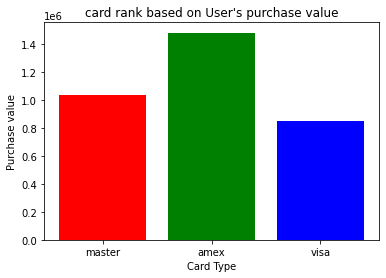

In [67]:
plt.bar(x,y,color = ['red','green','blue'])
plt.title("card rank based on User's purchase value")
plt.xlabel("Card Type")
plt.ylabel("Purchase value")